In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np 

In [2]:
data = pd.read_csv("df_par_id.csv")

In [3]:
1 == 1

True

In [4]:
data

,Unnamed: 0,customer_unique_id,freight_value,review_score,score_freq,price_y,score_rec,score_montant,score_rfm,customer_city,order_id,product_id,seller_id,categorie_regroupee
0,0,0000366f3b9a7992bf8c76cfdf3221e2,12.00,5.0,1.0,129.90,4.0,4.0,9.0,cajamar,e22acc9c116caa3f2b7121bbb380d08e,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,Mobilier
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,8.29,4.0,1.0,18.90,4.0,1.0,6.0,osasco,3594e05a005ac4d06a72673270ef9ec9,5099f7000472b634fea8304448d20825,138dbe45fc62f1e244378131a6801526,Beauté et Santé
2,2,0000f46a3911fa3c0805444483337064,17.22,3.0,1.0,69.00,1.0,2.0,4.0,sao jose,b33ec3b699337181488304f362a6b734,64b488de448a5324c4134ea39c28a34b,3d871de0142ce09b7081e2b9d1733cb1,Livre et Papeterie
3,3,0000f6ccb0745a6a4b88665a16c9f078,17.63,4.0,1.0,25.99,2.0,1.0,4.0,belem,41272756ecddd9a9ed0180413cc22fb6,2345a354a6f2033609bbf62bf5be9ef6,ef506c96320abeedfb894c34db06f478,Technologie
4,4,0004aac84e0df4da2b147fca70cf8255,16.89,5.0,1.0,180.00,2.0,5.0,8.0,sorocaba,d957021f1127559cd947b62533f484f7,c72e18b3fe2739b8d24ebf3102450f37,70a12e78e608ac31179aea7f8422044b,Technologie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94716,94716,fffcf5a5ff07b0908bd4e2dbc735a684,248.71,5.0,1.0,1570.00,1.0,5.0,7.0,sanharo,725cf8e9c24e679a8a5a32cb92c9ce1e,['bbc5419bc92d76e27795c9ec2c233c64' 'c100e5fef...,17f51e7198701186712e53a39c564617,Beauté et Santé
94717,94717,fffea47cd6d3cc0a88bd621562a9d061,19.69,4.0,1.0,64.89,3.0,2.0,6.0,feira de santana,c71b9252fd7b3b263aaa4cb09319a323,251876e7ba013b87b7262fb2524e2d60,7aa4334be125fcdd2ba64b3180029f14,Alimentation
94718,94718,ffff371b4d645b6ecea244b27531430a,22.56,5.0,1.0,89.90,1.0,3.0,5.0,sinop,fdc45e6c7555e6cb3cc0daca2557dbe1,13ad6994bda56edfa0a269e3d9a9acb3,54aa8463e87776b5612f4bdc4bd5d4de,Bricolage et Jardin
94719,94719,ffff5962728ec6157033ef9805bacc48,18.69,5.0,1.0,115.00,4.0,4.0,9.0,bom jesus do norte,94d3ee0bc2a0af9d4fa47a4d63616e8d,461f43be3bdf8844e65b62d9ac2c7a5a,7d13fca15225358621be4086e1eb0964,Mode


In [5]:
from sklearn.cluster import KMeans
import pandas as pd

# Define the number of clusters
n_clusters = 4

# Use only the RFM score for clustering
X = data[["score_rfm"]].values

# Initialize the k-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the data frame as a new column
data["cluster"] = labels

# Group the data by cluster to see the statistics for each cluster
grouped = data.groupby("cluster").agg({"score_rfm": "mean"})

# Print the statistics for each cluster
print(grouped)


/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         score_rfm
cluster           
0         4.316543
1         8.429217
2         6.562082
3        10.336939


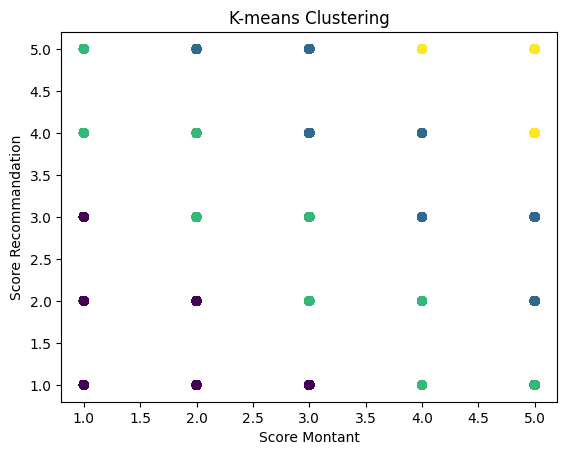

In [6]:
import matplotlib.pyplot as plt

plt.scatter(data["score_montant"], data["score_rec"], c=kmeans.labels_)
plt.xlabel("Score Montant")
plt.ylabel("Score Recommandation")
plt.title("K-means Clustering")
plt.show()


In [7]:
""" from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(data[["score_montant", "score_rec"]], kmeans.labels_)
print("Silhouette Score:", silhouette_score) """


' from sklearn.metrics import silhouette_score\n\nsilhouette_score = silhouette_score(data[["score_montant", "score_rec"]], kmeans.labels_)\nprint("Silhouette Score:", silhouette_score) '

/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


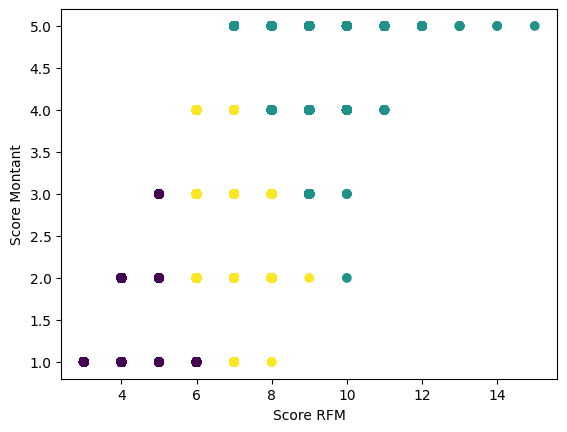

In [8]:
import matplotlib.pyplot as plt

# Fit the KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[["score_rfm", "score_montant"]])

# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Plot the data points, coloring each one based on its cluster assignment
plt.scatter(data["score_rfm"], data["score_montant"], c=cluster_assignments)
plt.xlabel("Score RFM")
plt.ylabel("Score Montant")
plt.show()


In [9]:
data.columns

Index(['Unnamed: 0', 'customer_unique_id', 'freight_value', 'review_score',
       'score_freq', 'price_y', 'score_rec', 'score_montant', 'score_rfm',
       'customer_city', 'order_id', 'product_id', 'seller_id',
       'categorie_regroupee', 'cluster'],
      dtype='object')

In [10]:
data

,Unnamed: 0,customer_unique_id,freight_value,review_score,score_freq,price_y,score_rec,score_montant,score_rfm,customer_city,order_id,product_id,seller_id,categorie_regroupee,cluster
0,0,0000366f3b9a7992bf8c76cfdf3221e2,12.00,5.0,1.0,129.90,4.0,4.0,9.0,cajamar,e22acc9c116caa3f2b7121bbb380d08e,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,Mobilier,1
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,8.29,4.0,1.0,18.90,4.0,1.0,6.0,osasco,3594e05a005ac4d06a72673270ef9ec9,5099f7000472b634fea8304448d20825,138dbe45fc62f1e244378131a6801526,Beauté et Santé,2
2,2,0000f46a3911fa3c0805444483337064,17.22,3.0,1.0,69.00,1.0,2.0,4.0,sao jose,b33ec3b699337181488304f362a6b734,64b488de448a5324c4134ea39c28a34b,3d871de0142ce09b7081e2b9d1733cb1,Livre et Papeterie,0
3,3,0000f6ccb0745a6a4b88665a16c9f078,17.63,4.0,1.0,25.99,2.0,1.0,4.0,belem,41272756ecddd9a9ed0180413cc22fb6,2345a354a6f2033609bbf62bf5be9ef6,ef506c96320abeedfb894c34db06f478,Technologie,0
4,4,0004aac84e0df4da2b147fca70cf8255,16.89,5.0,1.0,180.00,2.0,5.0,8.0,sorocaba,d957021f1127559cd947b62533f484f7,c72e18b3fe2739b8d24ebf3102450f37,70a12e78e608ac31179aea7f8422044b,Technologie,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94716,94716,fffcf5a5ff07b0908bd4e2dbc735a684,248.71,5.0,1.0,1570.00,1.0,5.0,7.0,sanharo,725cf8e9c24e679a8a5a32cb92c9ce1e,['bbc5419bc92d76e27795c9ec2c233c64' 'c100e5fef...,17f51e7198701186712e53a39c564617,Beauté et Santé,2
94717,94717,fffea47cd6d3cc0a88bd621562a9d061,19.69,4.0,1.0,64.89,3.0,2.0,6.0,feira de santana,c71b9252fd7b3b263aaa4cb09319a323,251876e7ba013b87b7262fb2524e2d60,7aa4334be125fcdd2ba64b3180029f14,Alimentation,2
94718,94718,ffff371b4d645b6ecea244b27531430a,22.56,5.0,1.0,89.90,1.0,3.0,5.0,sinop,fdc45e6c7555e6cb3cc0daca2557dbe1,13ad6994bda56edfa0a269e3d9a9acb3,54aa8463e87776b5612f4bdc4bd5d4de,Bricolage et Jardin,0
94719,94719,ffff5962728ec6157033ef9805bacc48,18.69,5.0,1.0,115.00,4.0,4.0,9.0,bom jesus do norte,94d3ee0bc2a0af9d4fa47a4d63616e8d,461f43be3bdf8844e65b62d9ac2c7a5a,7d13fca15225358621be4086e1eb0964,Mode,1


In [11]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()


In [12]:
categorical_columns

['customer_unique_id',
 'customer_city',
 'order_id',
 'product_id',
 'seller_id',
 'categorie_regroupee']

In [13]:
data.dtypes

Unnamed: 0               int64
customer_unique_id      object
freight_value          float64
review_score           float64
score_freq             float64
price_y                float64
score_rec              float64
score_montant          float64
score_rfm              float64
customer_city           object
order_id                object
product_id              object
seller_id               object
categorie_regroupee     object
cluster                  int32
dtype: object

In [14]:
data = data.drop(['product_category_name'], axis=1)


KeyError: "['product_category_name'] not found in axis"

In [ ]:
data.columns

Index(['customer_unique_id', 'Unnamed: 0', 'customer_zip_code_prefix',
       'order_item_id', 'price_x', 'freight_value', 'review_score',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'diff_days', 'dummy',
       'score_freq', 'price_y', 'score_rec', 'score_montant', 'score_rfm',
       'customer_id', 'customer_unique_id.1', 'customer_city',
       'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_id', 'seller_id',
       'shipping_limit_date', 'review_id', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'date_achat', 'date_initial',
       'categorie_regroupee', 'cluster'],
      dtype='object')

In [ ]:
float_columns = data.select_dtypes(include=['float']).columns.tolist()
int32_columns = data.select_dtypes(include=['int32']).columns.tolist()
int64_columns = data.select_dtypes(include=['int64']).columns.tolist()

In [ ]:
to_keep_columns = float_columns + int32_columns + int64_columns

In [ ]:
to_keep_columns

['Unnamed: 0',
 'customer_zip_code_prefix',
 'order_item_id',
 'price_x',
 'freight_value',
 'review_score',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'diff_days',
 'dummy',
 'score_freq',
 'price_y',
 'score_rec',
 'score_montant',
 'score_rfm',
 'cluster']

In [ ]:
data_elbow = data[to_keep_columns]

In [ ]:
df = data_elbow
# changer en df

In [ ]:
df = df.dropna()

/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/potages/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

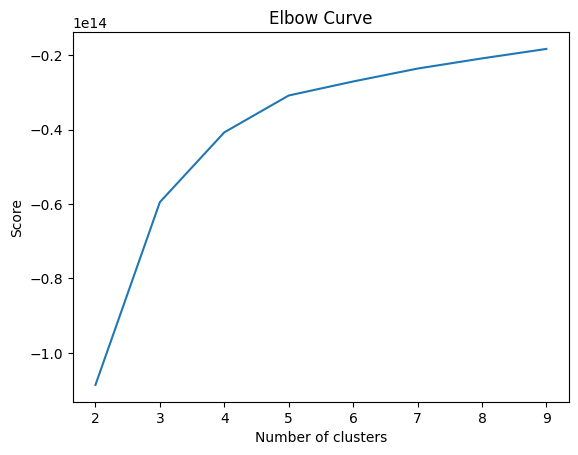

In [ ]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

def find_optimal_clusters(data):
    # Number of clusters
    k = range(2, 10)
    km = [KMeans(n_clusters=i) for i in k]
    score = [km[i].fit(data).score(data) for i in range(len(km))]
    
    # Plot the elbow
    plt.plot(k, score)
    plt.xlabel('Number of clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()
    
    # Use knee locator to determine optimal number of clusters
    kn = KneeLocator(k, score, curve='convex', direction='decreasing')
    return kn.knee

# Find optimal number of clusters for your data
optimal_clusters = find_optimal_clusters(df)


In [ ]:
optimal_clusters

2

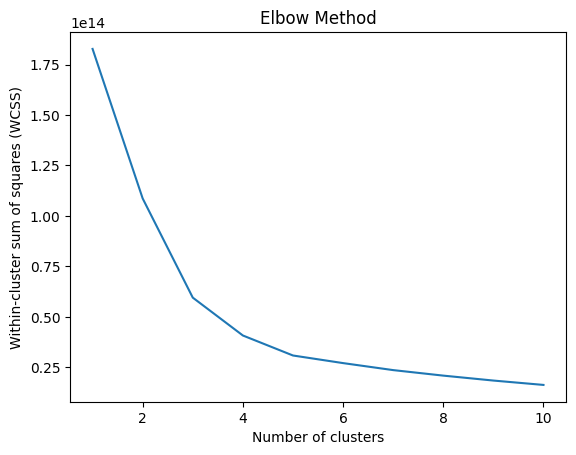

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Fit the KMeans model for a range of different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the WCSS versus number of clusters
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares (WCSS)")
plt.show()


In [ ]:
df.dtypes

Unnamed: 0                    float64
customer_zip_code_prefix      float64
order_item_id                 float64
price_x                       float64
freight_value                 float64
review_score                  float64
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
diff_days                     float64
dummy                         float64
score_freq                    float64
price_y                       float64
score_rec                     float64
score_montant                 float64
score_rfm                     float64
cluster                         int32
dtype: object

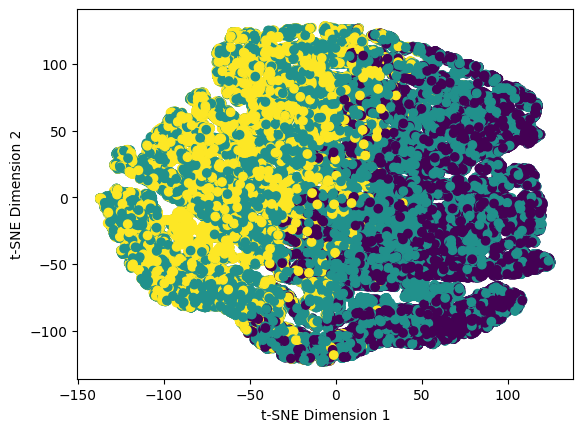

In [ ]:
from sklearn.manifold import TSNE

# create the t-SNE object with the desired parameters
tsne = TSNE()

# fit and transform the data
reduced_data = tsne.fit_transform(df)

# plot the transformed data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df["cluster"], cmap="viridis")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show() 
# T-SNE


c'est pire qu'avant largement 

In [ ]:
dfa = pd.read_csv("data_analys.csv")

In [ ]:
dfa["dummy"] = 1

In [ ]:
dfa[dfa["order_id_y"].duplicated(keep=False)]

KeyError: 'order_id_y'

au moment du merge , enlever les doublons 